In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the file specifying the character that separates values, and skipping the first 12 rows
data0 = np.genfromtxt('Mouse number 0.csv', dtype=[('clusterid', int), ('time', float), ('category', '<16U')], delimiter=',', skip_header=1, usecols = (0, 1, 4))
data0['time']

array([  4.00000000e-03,   3.47000000e-02,   3.53333333e-02, ...,
         3.59886180e+03,   3.59897837e+03,   3.59929400e+03])

In [3]:
np.genfromtxt?

In [4]:
data0

array([(130,   4.00000000e-03, 'fast regular'),
       (130,   3.47000000e-02, 'fast regular'),
       (130,   3.53333333e-02, 'fast regular'), ...,
       (136,   3.59886180e+03, 'slow irregular'),
       (136,   3.59897837e+03, 'slow irregular'),
       (136,   3.59929400e+03, 'slow irregular')],
      dtype=[('clusterid', '<i8'), ('time', '<f8'), ('category', '<U16')])

In [5]:
data0.shape

(601542,)

In [6]:
x=np.unique(data0['clusterid'])

In [7]:
x

array([  0,   2,  11,  12,  16,  22,  25,  26,  29,  32,  35,  40,  45,
        49,  53,  63,  68,  69,  72,  73,  75,  76,  86,  88, 126, 127,
       130, 131, 132, 133, 134, 136, 141, 142, 143, 144, 145])

In [8]:
y = []
for i in np.unique(x):
    y.append(data0['time'][np.where(data0['clusterid']==i)])
    #y[x[i]==data0[:,1]]
    

In [9]:

print(y[1])

[  7.97533333e-01   1.53996667e+00   1.95286667e+00 ...,   3.59957150e+03
   3.59971943e+03   3.59985117e+03]


In [10]:
y

[array([  9.69300000e-01,   1.24520000e+00,   1.78626667e+00, ...,
          3.59953623e+03,   3.59955050e+03,   3.59989533e+03]),
 array([  7.97533333e-01,   1.53996667e+00,   1.95286667e+00, ...,
          3.59957150e+03,   3.59971943e+03,   3.59985117e+03]),
 array([  142.24586667,   156.22373333,   234.23556667, ...,  3599.75043333,
         3599.90716667,  3599.99973333]),
 array([  3.42000000e-02,   2.69600000e-01,   6.87900000e-01, ...,
          3.59949907e+03,   3.59975473e+03,   3.59998393e+03]),
 array([  9.17733333e-01,   1.11853333e+00,   2.83320000e+00, ...,
          3.59899553e+03,   3.59945533e+03,   3.59985063e+03]),
 array([  1.61200000e-01,   7.65400000e-01,   1.40010000e+00, ...,
          3.59965140e+03,   3.59992823e+03,   3.59997453e+03]),
 array([  186.7275    ,   278.29336667,   303.02416667, ...,  3598.4579    ,
         3598.52456667,  3599.95136667]),
 array([  5.85566667e-01,   8.40733333e-01,   1.50793333e+00, ...,
          3.59880283e+03,   3.59936923e+

In [11]:
import os
import neo
import pickle
import numpy as np
# import distutils.util
from quantities import s,us
import matplotlib.pyplot as plt
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [12]:
#maximum and minimum time of recordings
t_start=min(data0['time'])
t_stop=max(data0['time'])
print(t_start)
print(t_stop)

0.004
3599.99973333


In [13]:
train=[]
for i,cl in enumerate(x):
  #  train_trial = y[i]
    train.append(neo.SpikeTrain(y[i]*s,
                            t_start=0*s,
                            t_stop=3600*s, name=cl))
    
    
    #append the spike train to the segment

    

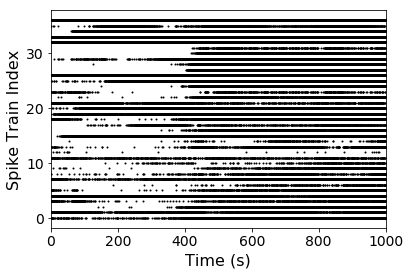

In [14]:
# plot spike trains
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
for i, spiketrain in enumerate(train):
    t = spiketrain.rescale(s)
    plt.plot(t[t<1000], i* np.ones_like(t[t<1000]), 'k.', markersize=2)
plt.axis('tight')
plt.xlim(0, 1000)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Spike Train Index', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [15]:
from elephant.statistics import isi, cv
cv_list = [cv(isi(spiketrain)) for spiketrain in train]

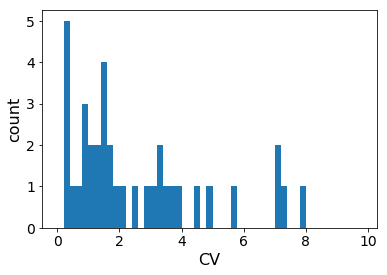

In [16]:
%matplotlib inline
plt.hist(cv_list,bins=np.arange(50)/5)
plt.xlabel('CV', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [17]:
cv_list = np.asarray(cv_list)


In [18]:
cv_list

array([ 1.4831947 ,  0.98477649,  4.83700055,  2.45704138,  0.88337189,
        7.09563984,  3.86955242,  1.21397654,  3.23917557,  7.02220927,
        1.83938145,  1.18397475,  3.20451416,  3.58953704,  5.68868327,
        0.7944894 ,  3.10492532,  1.09131111,  2.90325383,  0.32988538,
        0.87454449,  1.42776689,  4.4585493 ,  3.65799015,  7.93582083,
        1.76882528,  1.20910593,  0.28908549,  7.24367002,  2.06591196,
        0.2751732 ,  1.54832968,  0.318583  ,  0.43715019,  0.22300175,
        1.70161814,  1.54718052])

In [63]:
plt.hist?


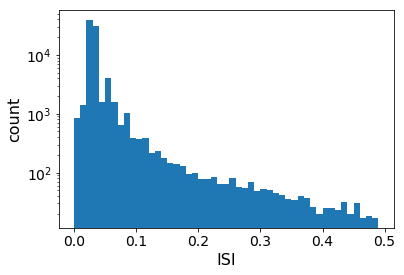

In [47]:
isi_spiketrain=isi(spiketrain)
plt.hist(isi_spiketrain.magnitude,bins=np.arange(50)/100)
plt.semilogy()
plt.xlabel('ISI', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.show()
#isi_spiketrain.magnitude

In [53]:
import elephant
elephant.statistics.fanofactor(train)


18360.474729225167

In [72]:
len(train)
print(ifr_spiketrain)
print(type(ifr_spiketrain))

[[ 1.75517854]
 [ 1.75544846]
 [ 1.75571837]
 ..., 
 [ 1.01504732]
 [ 1.01487766]
 [ 1.01470801]] Hz
<class 'neo.core.analogsignal.AnalogSignal'>


In [103]:
len(train)

37

In [154]:
#mean firing rate calculation
iFr = []
for iTr in range(len(train)):
    iFr.append(elephant.statistics.instantaneous_rate(train[iTr], .02*s, kernel='auto', 
                                                        cutoff=5.0, t_start=400*s, t_stop=500*s, trim=False))
  #  train_trial = y[i]
    
    
    #ifr_spiketrain [i] = elephant.statistics.instantaneous_rate(train[i], .02*s, kernel='auto', 
                                                        #cutoff=5.0, t_start=0*s, t_stop=1000*s, trim=False)

   # plt.plot(iFr.magnitude)
iFr = np.asarray(iFr)


/home/ocnc/.local/lib/python3.6/site-packages/elephant/statistics.py:817: UserWarning: Instantaneous firing rate approximation contains negative values, possibly caused due to machine precision errors.
  warnings.warn("Instantaneous firing rate approximation contains "


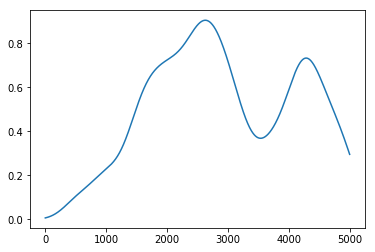

In [122]:
plt.plot(iFr[3])

In [126]:
iFr.shape


(37, 5000, 1)

In [127]:
iFr


array([[[  1.22504558],
        [  1.23081387],
        [  1.23658634],
        ..., 
        [  1.67349962],
        [  1.66638108],
        [  1.65926129]],

       [[  1.18305372],
        [  1.19203944],
        [  1.20104409],
        ..., 
        [  0.43313439],
        [  0.42954219],
        [  0.42596083]],

       [[  1.30032249],
        [  1.30721538],
        [  1.31410162],
        ..., 
        [  1.40451381],
        [  1.39630504],
        [  1.38809917]],

       ..., 
       [[  2.07487792],
        [  2.07899392],
        [  2.08310982],
        ..., 
        [  1.69822603],
        [  1.69474711],
        [  1.69126869]],

       [[  0.58966082],
        [  0.59125098],
        [  0.5928366 ],
        ..., 
        [  1.6179211 ],
        [  1.61229601],
        [  1.60666896]],

       [[ 16.11750046],
        [ 16.17674034],
        [ 16.23597917],
        ..., 
        [ 16.87462784],
        [ 16.81368994],
        [ 16.75274731]]])

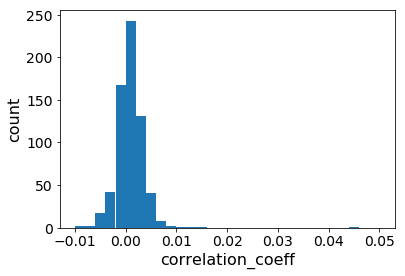

In [244]:
#correlation coeff between spike trains
from elephant.conversion import BinnedSpikeTrain
cc_matrix = elephant.spike_train_correlation.corrcoef(BinnedSpikeTrain(train, binsize=.005*s))

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(cc_matrix[np.tri(cc_matrix.shape[0], k=-1)==True],bins=np.arange(-.01, .0500001, 0.002))
#plt.semilogy()
plt.xlabel('correlation_coeff', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [222]:
np.tri?

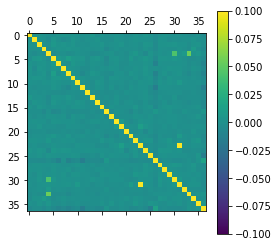

In [211]:
plt.matshow(cc_matrix,vmin=-0.1,vmax=0.1)
plt.colorbar()

/home/ocnc/anaconda3/envs/ocnc2018/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


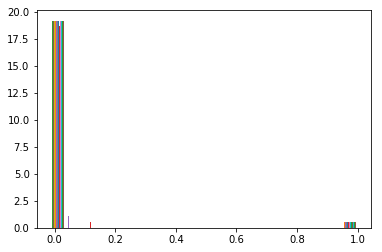

In [196]:
# Make a multiple-histogram of data-sets with different length.
#x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
n_bins = 20

plt.hist(cc_matrix, n_bins, normed=1, histtype='bar')



fig.tight_layout()
plt.show()

In [170]:
cc_matrix


array([[  1.00000000e+00,   2.08295535e-03,   3.23209681e-03, ...,
         -1.64642381e-03,   1.16885411e-03,  -4.25293094e-03],
       [  2.08295535e-03,   1.00000000e+00,   2.53011724e-03, ...,
          2.80981279e-03,  -6.18758127e-04,  -1.17152634e-03],
       [  3.23209681e-03,   2.53011724e-03,   1.00000000e+00, ...,
          2.46708488e-03,   3.24519156e-03,  -1.38601022e-03],
       ..., 
       [ -1.64642381e-03,   2.80981279e-03,   2.46708488e-03, ...,
          1.00000000e+00,  -6.33448625e-05,   4.52021952e-04],
       [  1.16885411e-03,  -6.18758127e-04,   3.24519156e-03, ...,
         -6.33448625e-05,   1.00000000e+00,   4.00418444e-03],
       [ -4.25293094e-03,  -1.17152634e-03,  -1.38601022e-03, ...,
          4.52021952e-04,   4.00418444e-03,   1.00000000e+00]])

In [133]:
min(len(train[1]), len(train[2]))

13438